**Phan Lê Anh Thư**

- White Wine Quality
1. Exploratory Data Analysis
2. Quality Classification sing k-NN, Decision Tree, Random Forest, Stochastic Gradient Descent và Support Vector Classifiers


## Overview

**Dataset**

**Objectives**

### Load data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df_red = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv", delimiter=";")

In [3]:
df_red.shape

(4898, 12)

In [4]:
df_red.sample(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
4388,6.7,0.260,0.29,7.1,0.036,28.0,100.0,0.99534,3.08,0.36,9.3,6
2209,7.0,0.320,0.35,1.5,0.039,24.0,125.0,0.99180,3.17,0.64,12.2,6
2864,5.3,0.160,0.39,1.0,0.028,40.0,101.0,0.99156,3.57,0.59,10.6,6
3373,6.9,0.280,0.24,2.1,0.034,49.0,121.0,0.98882,2.98,0.43,13.2,7
4688,6.7,0.160,0.32,12.5,0.035,18.0,156.0,0.99666,2.88,0.36,9.0,6
549,7.2,0.460,0.65,10.4,0.050,76.0,192.0,0.99760,3.16,0.42,8.7,5
3571,5.9,0.655,0.00,5.6,0.033,8.0,31.0,0.99360,3.32,0.51,10.5,4
3825,6.7,0.460,0.21,4.0,0.034,12.0,88.0,0.99016,3.26,0.54,13.0,6
302,6.1,0.410,0.00,1.6,0.063,36.0,87.0,0.99140,3.27,0.67,10.8,6
1530,7.2,0.270,0.74,12.5,0.037,47.0,156.0,0.99810,3.04,0.44,8.7,5


In [5]:
# Which are categorical variables?
df_red.select_dtypes('category').columns

Index([], dtype='object')

In [6]:
# Which are numerical variables?
df_red.select_dtypes('number').columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

# Data Processing

## Data Cleaning

### Missing values

In [7]:
df_red.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [8]:
df_red = df_red.fillna('Unknown')

### Outliers

C:\Users\Lenovo\AppData\Local\Programs\Python\Python38-32\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='alcohol', ylabel='Density'>

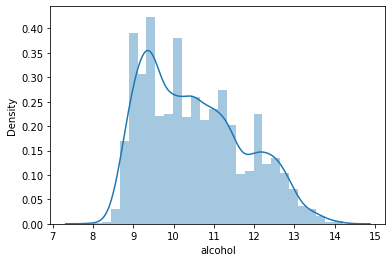

In [9]:
sns.distplot(df_red['alcohol'])

In [10]:
# Detect alcohol outliers using z-sore > 3

x = df_red['alcohol']
mu = x.mean()
sigma = x.std()
z_score = (x-mu)/sigma

df_red[abs(z_score) > 3].shape # How many outliers?

(0, 12)

In [11]:
outlier = df_red[abs(z_score) > 3]
df_no_outlier = df_red[abs(z_score) <= 3]
df_no_outlier

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7


### Encoding categorical variables

In [12]:
# One-hot encode the categorical variable

df_onehot = pd.get_dummies(df_red)
df_onehot

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7


# 1. Exploratory Data Analysis

In [13]:
import seaborn as sns

# Set theme for better visualization:
sns.set_theme(rc={'figure.figsize': (14, 8)}) # .set is an alias of .set_theme()

## 1.1 Descriptive Statistics

In [14]:
df_red.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
5,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
6,6.2,0.32,0.16,7.0,0.045,30.0,136.0,0.9949,3.18,0.47,9.6,6
7,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
8,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
9,8.1,0.22,0.43,1.5,0.044,28.0,129.0,0.9938,3.22,0.45,11.0,6


In [15]:
df_red.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


In [16]:
df_red.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.2 KB


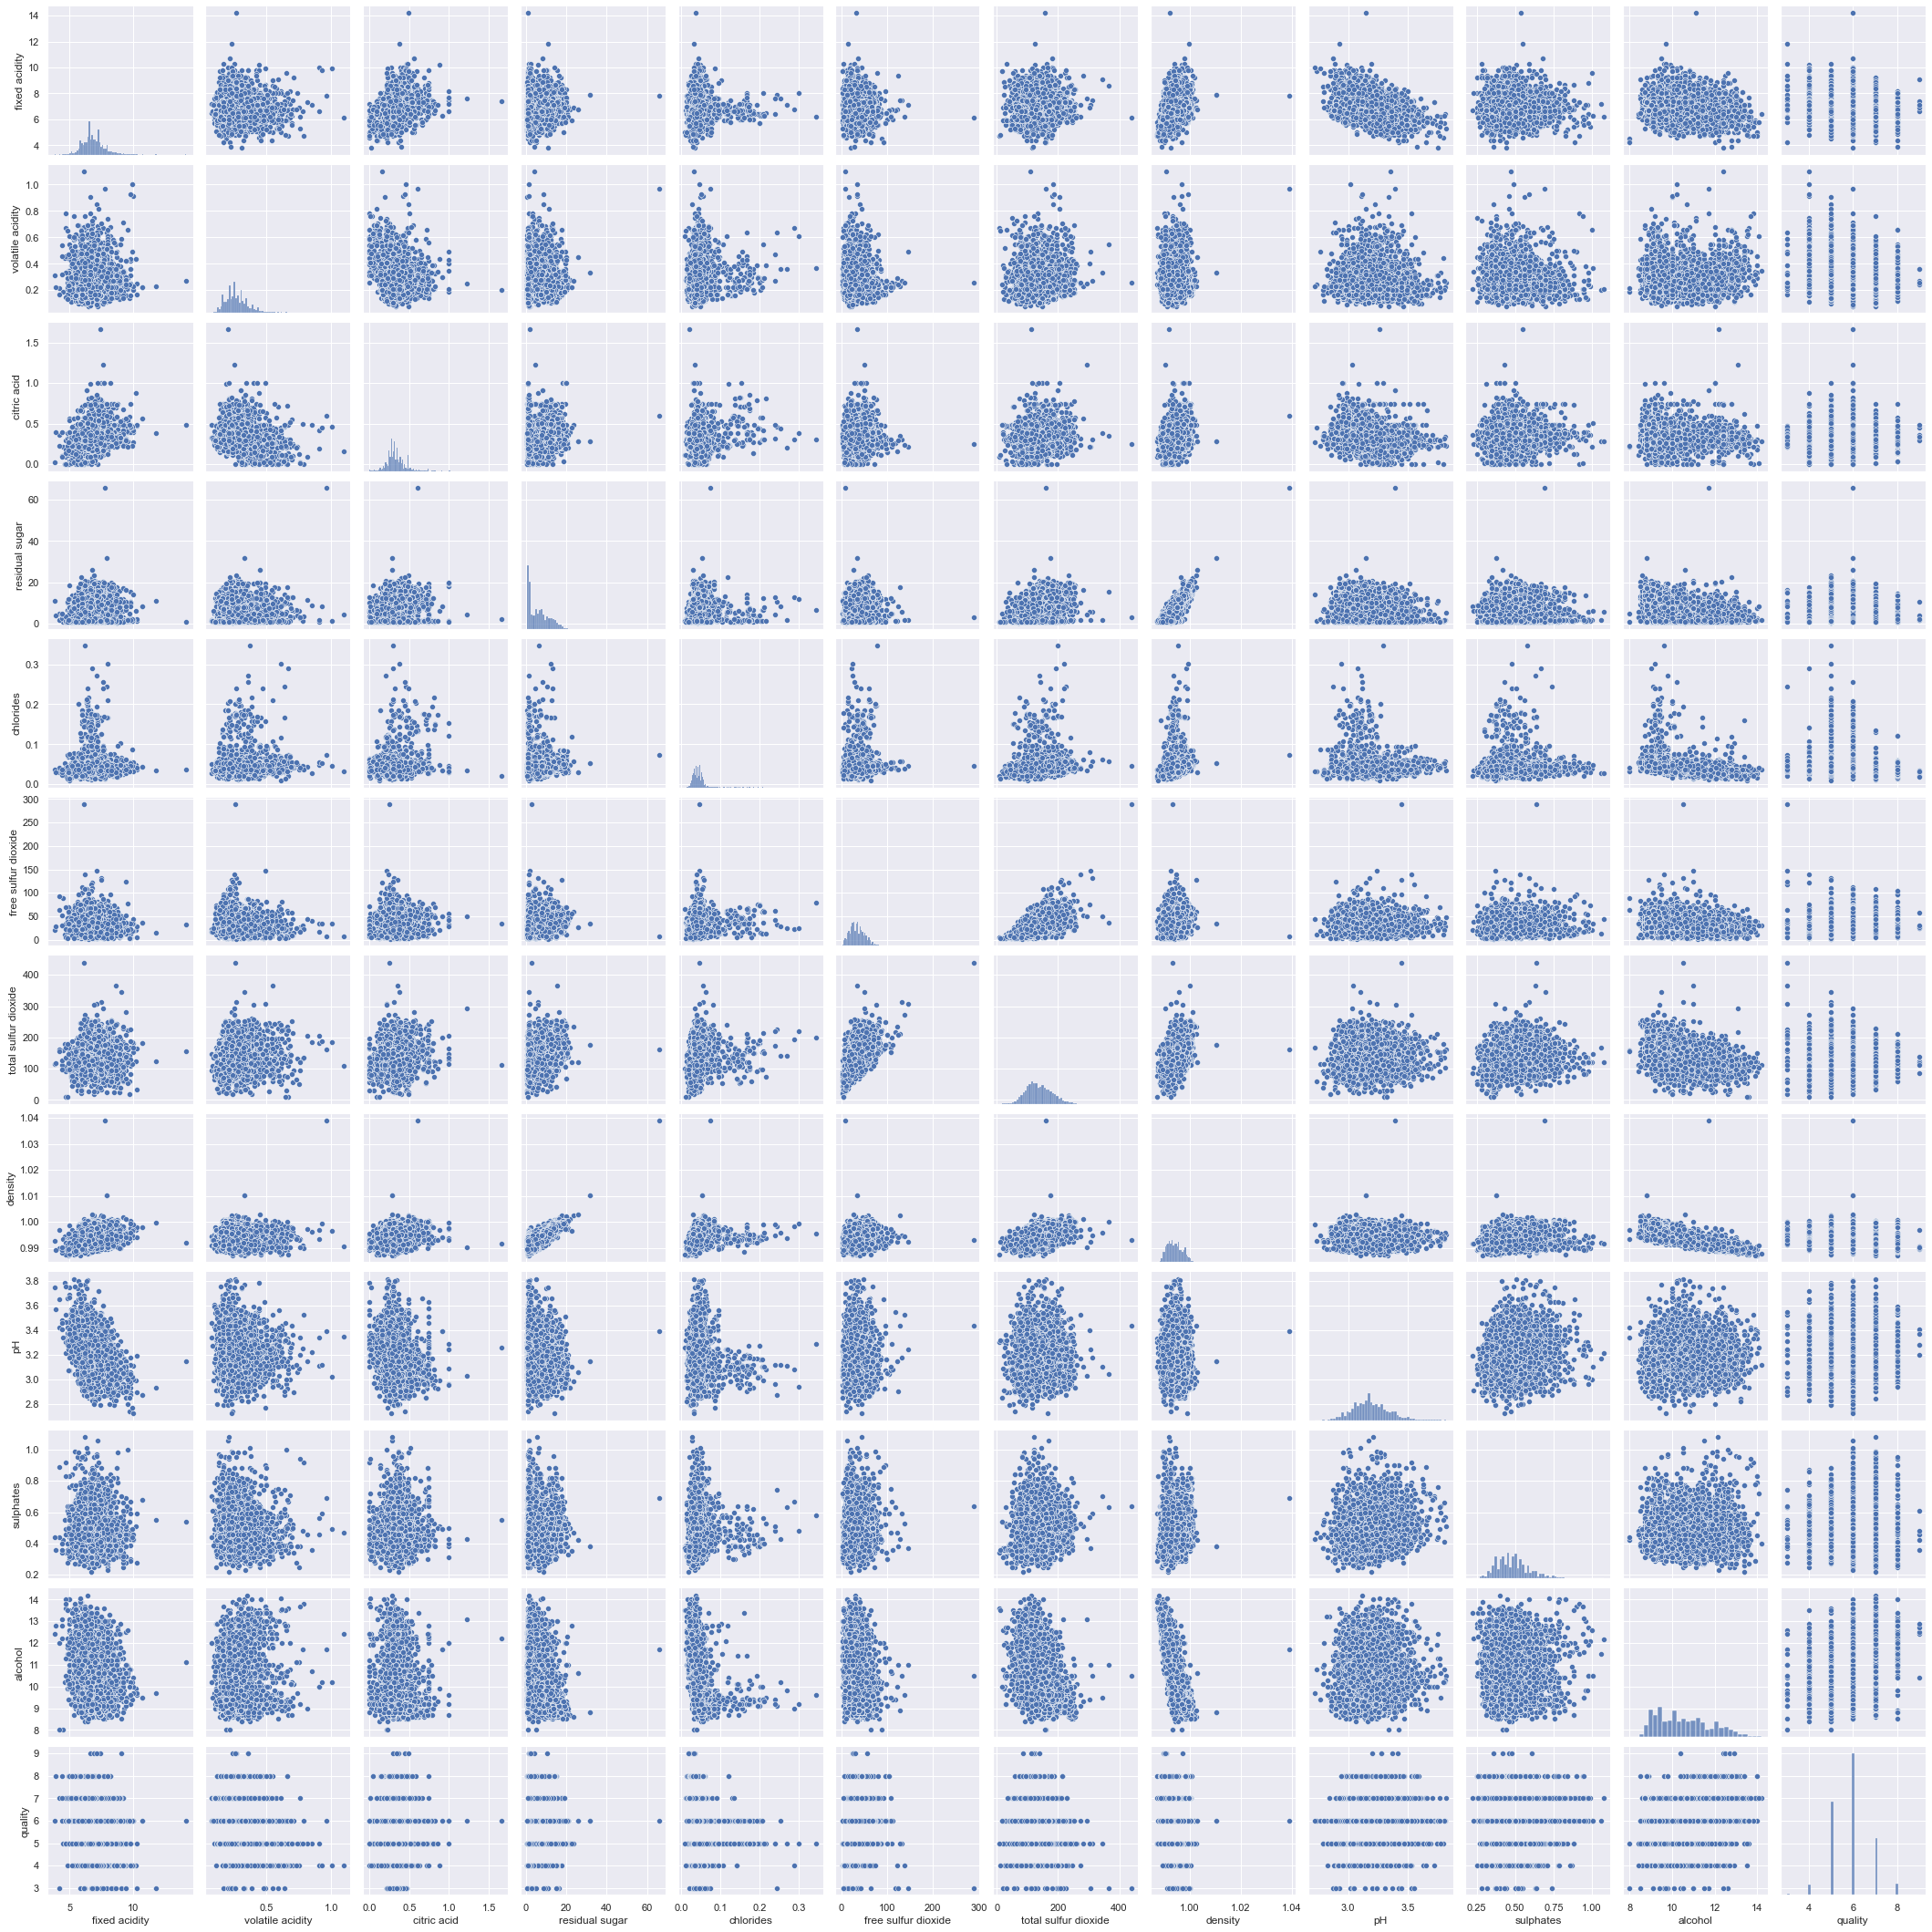

In [17]:
sns.pairplot(df_red)

### Univariate analysis (phân tích đơn biến)

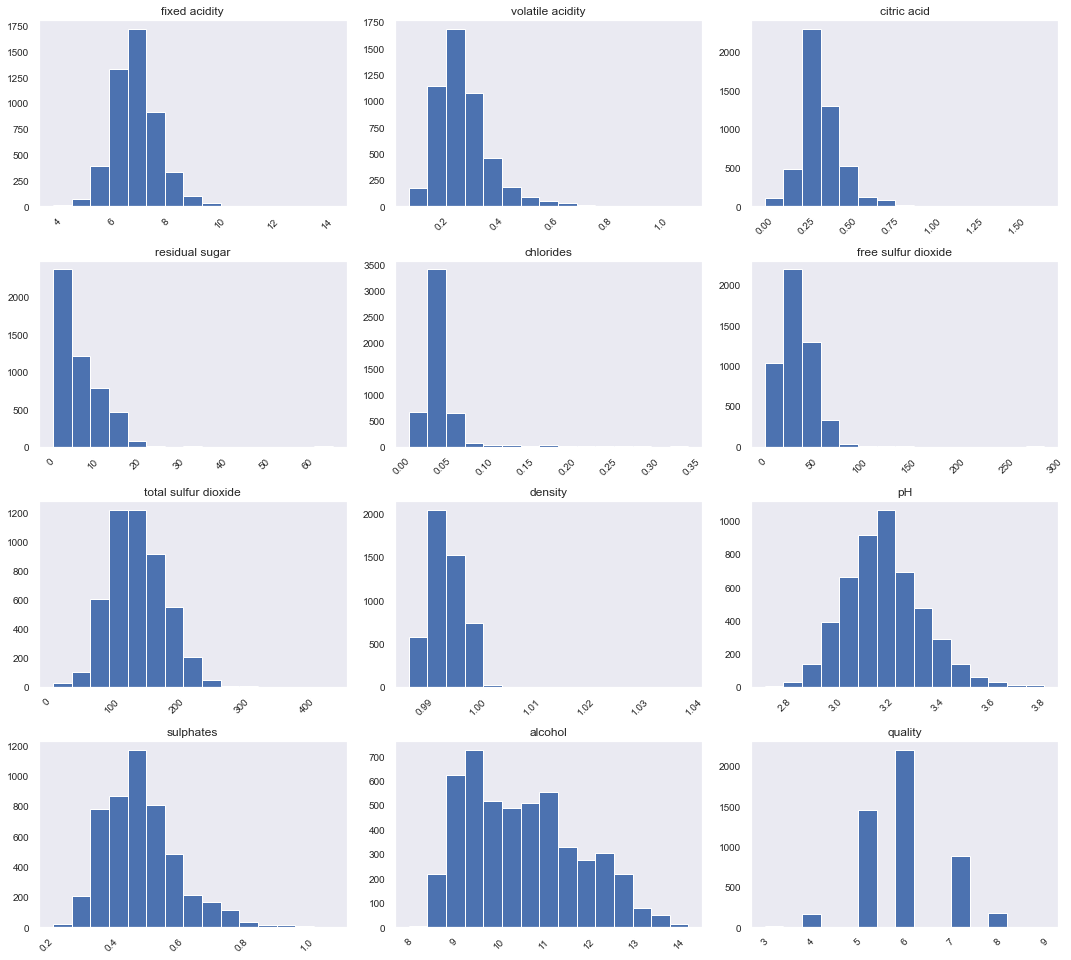

In [18]:
# Univariate analysis

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline


fig = df_red.hist(bins=15, linewidth=1.0, xlabelsize=10, ylabelsize=10, xrot=45, yrot=0, figsize=(10,9), grid=False)

plt.tight_layout(rect=(0, 0, 1.5, 1.5))

### Multivariate analysis

In [19]:
sns.set_theme(rc={'figure.figsize': (14, 8)})

Text(0.5, 0.98, 'Combined Wine Attributes and their Correlation Heatmap')

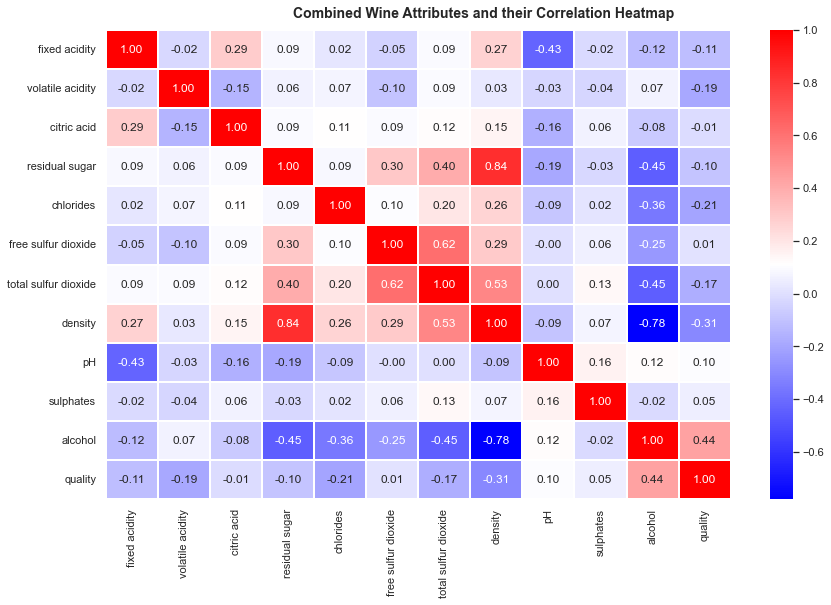

In [20]:
#Multivariate analysis by correlation matrix

fig, (ax) = plt.subplots(1, 1, figsize=(14,8))

hm = sns.heatmap(df_red.corr(), 
                 ax=ax,           
                 cmap="bwr", 
                 annot=True, 
                 fmt='.2f',       
                 linewidths=.05)

fig.subplots_adjust(top=0.94)
fig.suptitle('Combined Wine Attributes and their Correlation Heatmap', 
              fontsize=14, 
              fontweight='bold')

# sns.heatmap(df_red.corr(), annot=True, fmt='.2f', linewidths=2)

<AxesSubplot:xlabel='quality', ylabel='alcohol'>

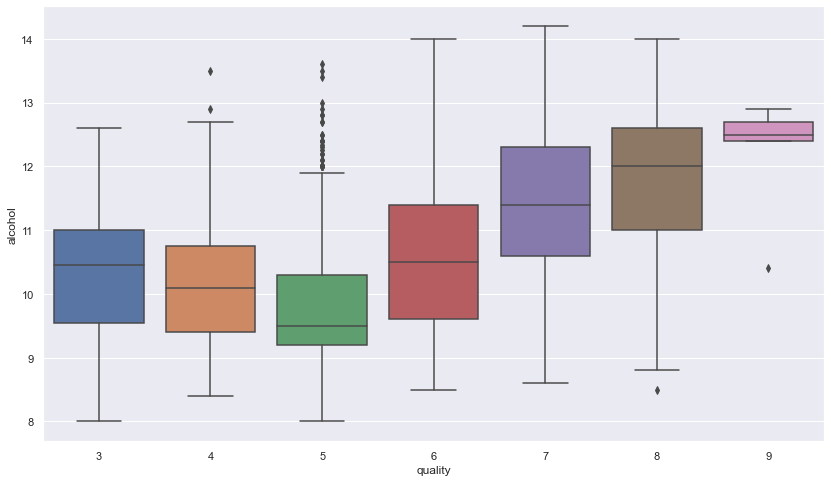

In [21]:
# Alcohol versus quality
sns.boxplot(x='quality', y='alcohol', data = df_red)

<AxesSubplot:xlabel='quality', ylabel='alcohol'>

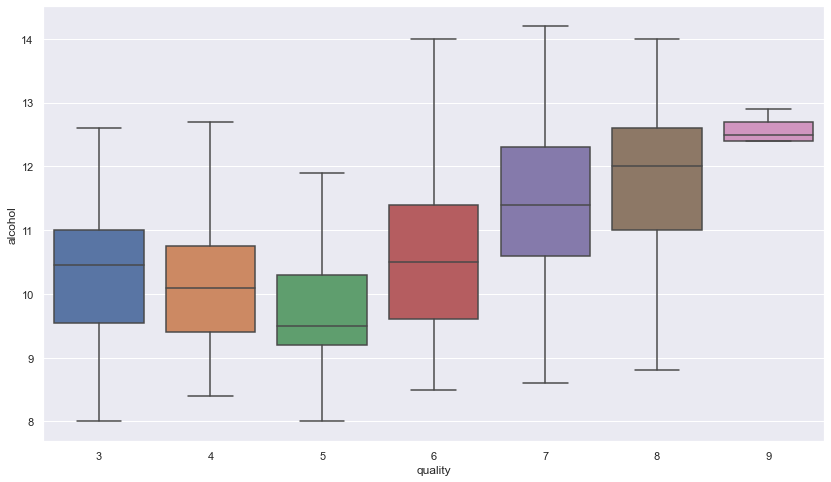

In [22]:
# Alcohol versus quality remove outliers
sns.boxplot(x='quality', y='alcohol', data = df_red, showfliers=False)

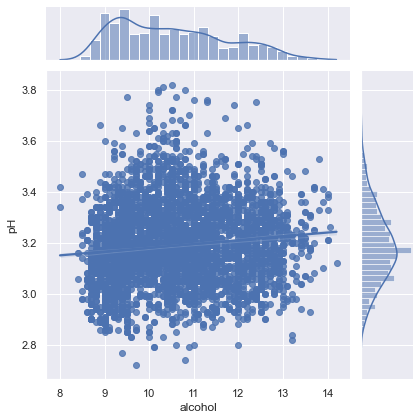

In [23]:
# Alcohol versus pH
sns.jointplot(x='alcohol',y='pH',data=df_red, kind='reg')

## 1.2 Correlation

<AxesSubplot:>

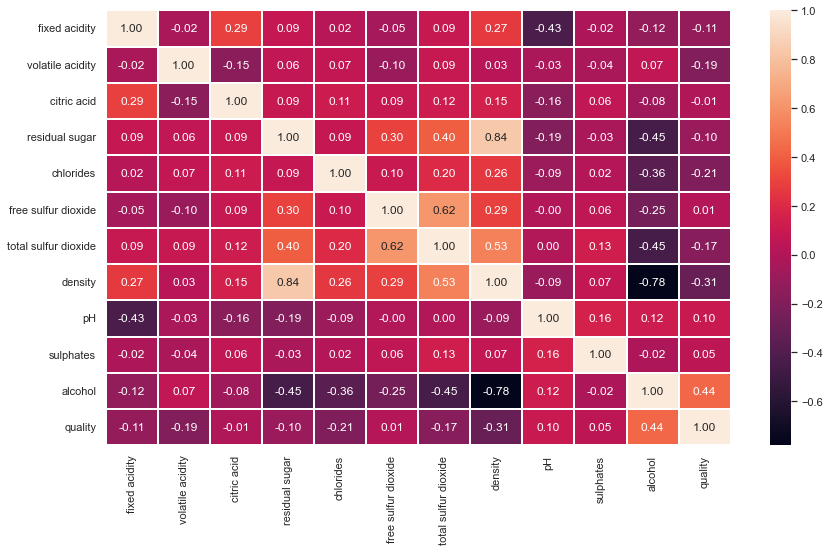

In [24]:

sns.heatmap(df_red.corr(), annot=True, fmt='.2f', linewidths=2)

In [25]:
#We can quantify the correlation using Pearson regression from scipy.stats, as shown here:

from scipy.stats import pearsonr

def get_correlation(column1, column2, df):
  pearson_corr, p_value = pearsonr(df[column1], df[column2])
  print("Correlation between {} and {} is {}".format(column1, column2, pearson_corr))
  print("P-value of this correlation is {}".format(p_value))

In [26]:
get_correlation('alcohol','pH', df_red)

Correlation between alcohol and pH is 0.12143209874912961
P-value of this correlation is 1.490059588201802e-17


## 1.3 Grouping Data

In [27]:
df_red['quality_label'] = df_red['quality'].apply(lambda value: ('low' if value <= 5 else 'medium') if value <= 7 else 'high')
df_red['quality_label'] = pd.Categorical(df_red['quality_label'], categories=['low', 'medium', 'high'])

# Grouping columns

subset_attr = ['alcohol', 'density', 'pH', 'quality']

low = round(df_red[df_red['quality_label'] == 'low'][subset_attr].describe(), 2)
medium = round(df_red[df_red['quality_label'] == 'medium'][subset_attr].describe(), 2)
high = round(df_red[df_red['quality_label'] == 'high'][subset_attr].describe(), 2)

pd.concat([low, medium, high], axis=1, 
          keys=['👎 Low Quality Wine', 
                '👌 Medium Quality Wine', 
                '👍 High Quality Wine'])

👎 Low Quality Wine                            👌 Medium Quality Wine  \
                 alcohol  density       pH  quality               alcohol   
count            1640.00  1640.00  1640.00  1640.00               3078.00   
mean                9.85     1.00     3.17     4.88                 10.80   
std                 0.88     0.00     0.14     0.36                  1.23   
min                 8.00     0.99     2.79     3.00                  8.50   
25%                 9.20     0.99     3.08     5.00                  9.80   
50%                 9.60     1.00     3.16     5.00                 10.80   
75%                10.40     1.00     3.24     5.00                 11.80   
max                13.60     1.00     3.79     5.00                 14.20   

                                 👍 High Quality Wine                          
       density       pH  quality             alcohol density      pH quality  
count  3078.00  3078.00  3078.00              180.00  180.00  180.00  180.00  
mean      0.99     3.20     6.29               11.65    0.99    3.22    8.03  
std       0.00     0.15     0.45                1.27    0.00    0.15    0.16  
min       0.99     2.72     6.00                8.50    0.99    2.94    8.00  
25%       0.99     3.09     6.00               11.00    0.99    3.13    8.00  
50%       0.99     3.19     6.00               12.00    0.99    3.23    8.00  
75%       1.00     3.29     7.00               12.60    0.99    3.33    8.00  
max       1.04     3.82     7.00               14.00    1.00    3.59    9.00

# 2. Wine Quality Classification

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import RandomizedSearchCV

## Visualize

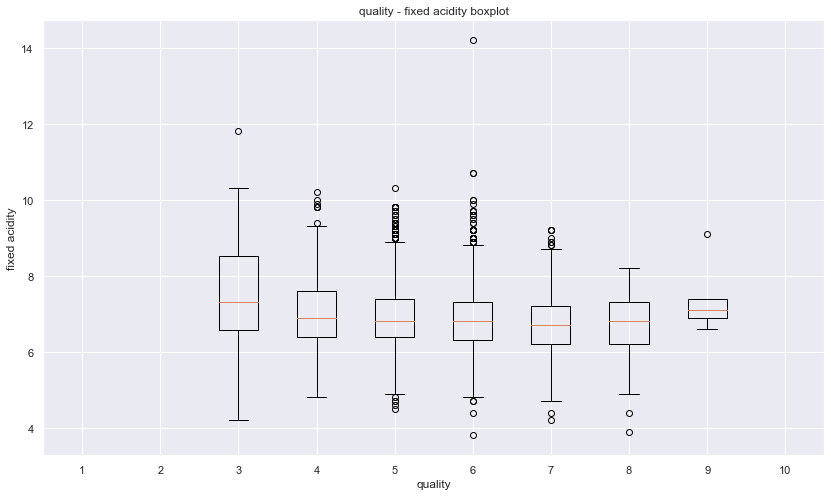

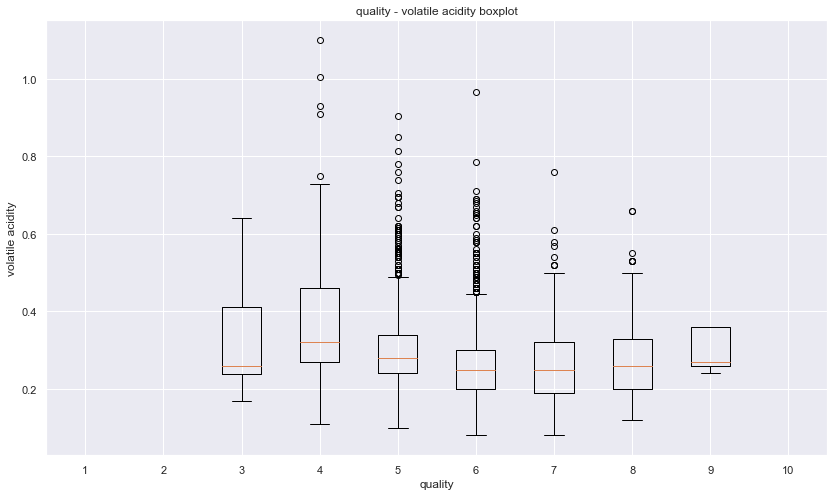

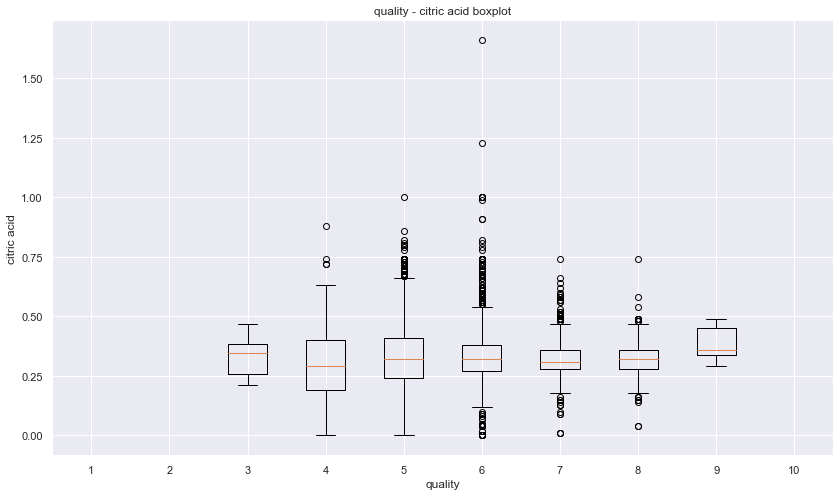

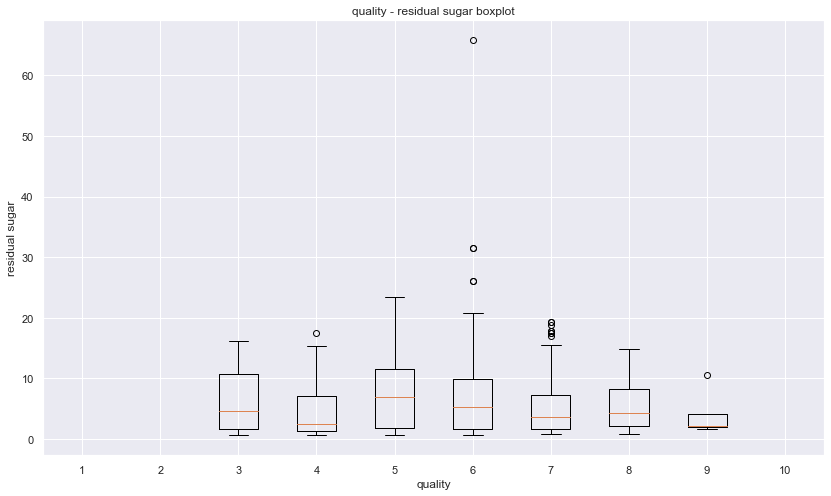

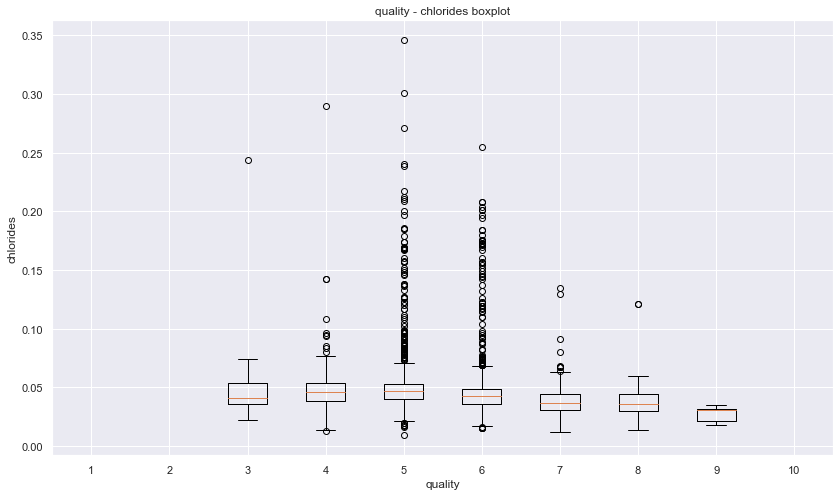

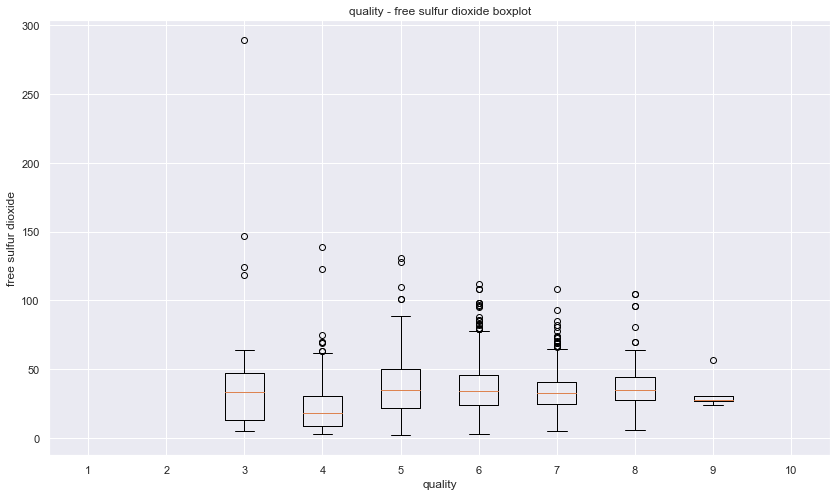

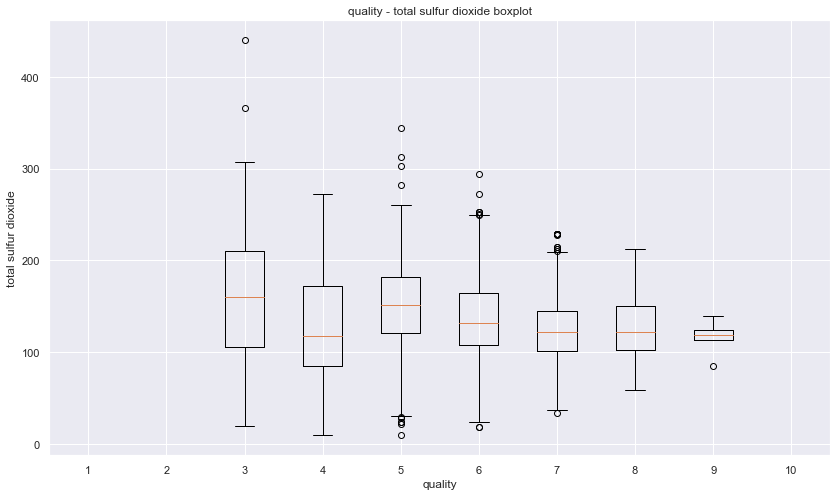

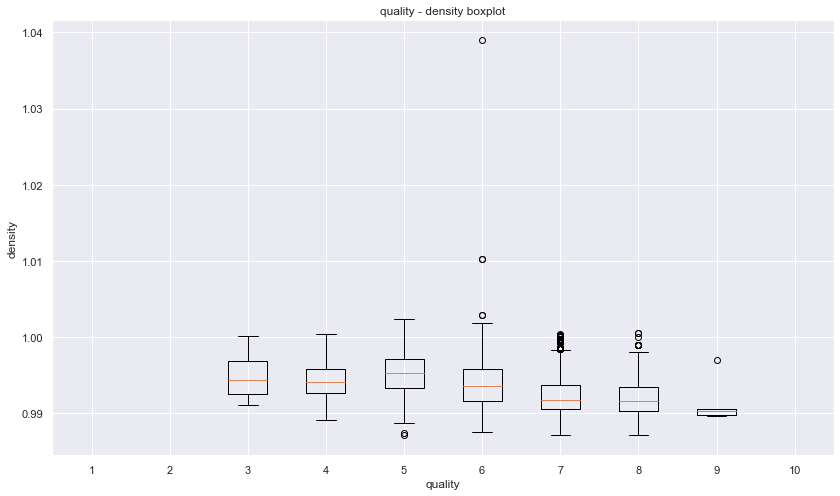

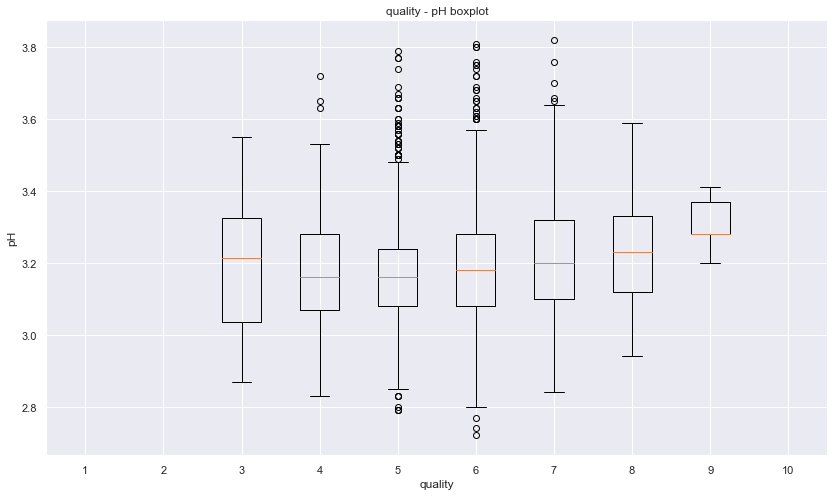

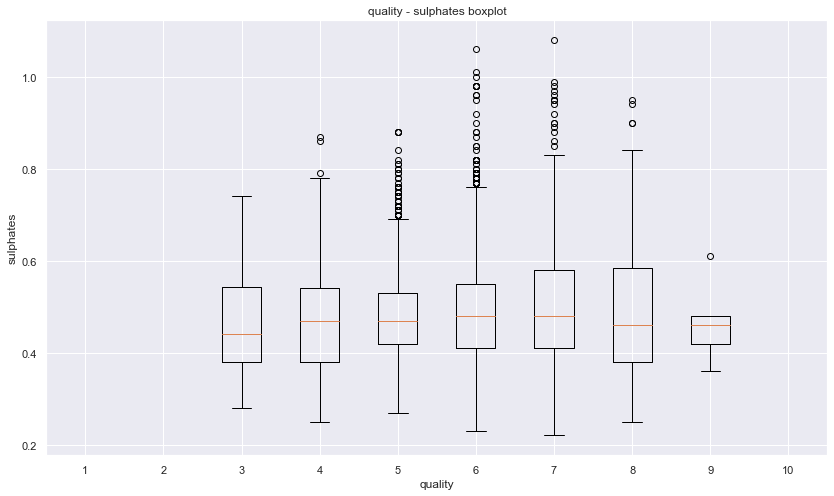

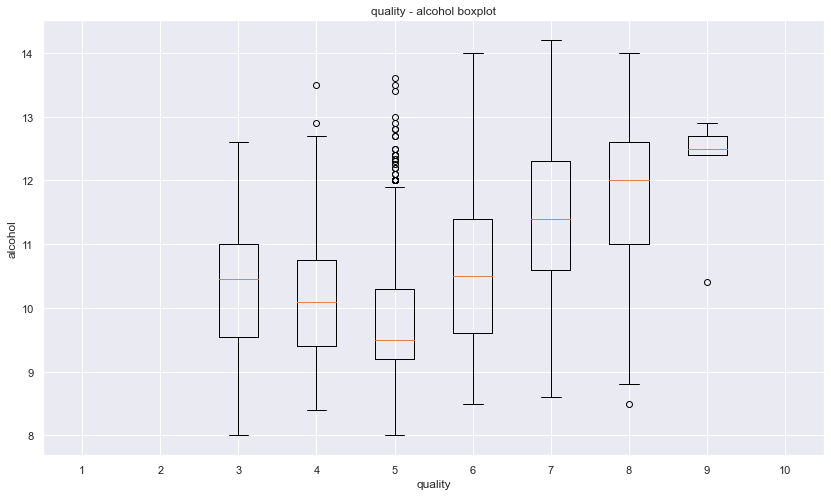

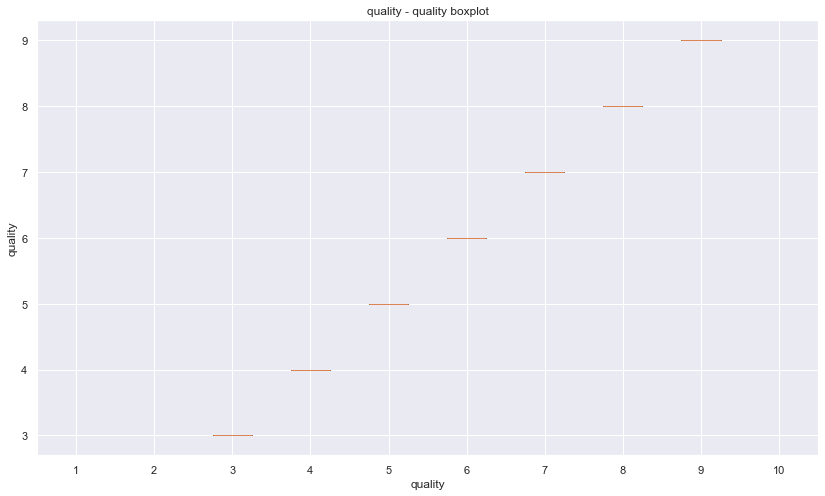

In [29]:
for label in df_red.columns[:-1]:
    plt.boxplot([df_red[df_red['quality'] == i][label] for i in range(1,11)])
    plt.title('quality - ' + label + ' boxplot')
    plt.xlabel('quality')
    plt.ylabel(label)
    # plt.savefig('imgs/'+'red'.join(label.split(' ')))
    plt.show()

## Splitting dataset in to training and validating, test data

In [30]:
df_red.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,quality_label
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,medium
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,medium
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,medium
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,medium
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,medium


In [31]:
# Since the numbers 3-9 don't really mean much, lets map these to low(0), mid(1), and high(2)
bins = [0, 5.5, 7.5, 10] # this means 3-5 are low, 6-7 are mid, 8-9 are high
labels = [0, 1, 2]
df_red['quality_class'] = pd.cut(df_red['quality'], bins=bins, labels=labels)
df_red.sample(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,quality_label,quality_class
2901,6.5,0.22,0.32,2.2,0.028,36.0,92.0,0.99076,3.27,0.59,11.9,7,medium,1
3232,6.7,0.31,0.32,14.5,0.038,6.0,79.0,0.99412,3.14,0.34,12.5,5,low,0
3131,6.3,0.35,0.26,17.6,0.061,59.0,198.0,0.99918,3.11,0.49,8.8,5,low,0
2953,6.0,0.28,0.25,1.8,0.042,8.0,108.0,0.99290,3.08,0.55,9.0,5,low,0
1072,8.2,0.29,0.33,9.1,0.036,28.0,118.0,0.99530,2.96,0.40,10.9,7,medium,1
1073,7.7,0.34,0.30,8.0,0.048,25.0,192.0,0.99510,2.97,0.47,10.9,5,low,0
3544,6.0,0.33,0.20,1.8,0.031,49.0,159.0,0.99190,3.41,0.53,11.0,6,medium,1
2368,7.4,0.34,0.30,14.9,0.037,70.0,169.0,0.99698,3.25,0.37,10.4,6,medium,1
3177,5.6,0.41,0.22,7.1,0.050,44.0,154.0,0.99310,3.30,0.40,10.5,5,low,0
1271,8.1,0.50,0.47,1.1,0.037,23.0,126.0,0.99380,3.21,0.42,10.9,5,low,0


In [32]:
# Drop the categorical grouping created before to get a full-numerical dataset
# df_red = df_red.drop(columns=['quality_label'])

### Spliting data

In [33]:
df_red.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,quality_label,quality_class
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,medium,1
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,medium,1
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,medium,1
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,medium,1
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,medium,1


In [56]:
# Get data except the quality and quality label column (all that are predictors)
x = df_red[df_red.columns[0:11]]

# Set quality as y (it is response of our model)
y = df_red['quality_class']

In [55]:
df_red.columns[0:11]

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol'],
      dtype='object')

In [57]:
df_red['quality_class'].unique()

[1, 0, 2]
Categories (3, int64): [0 < 1 < 2]

In [58]:
# Standardize
sc = StandardScaler()
x = sc.fit_transform(x)

# Spliting data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.2, random_state=42)

In [59]:
for data in [y_train, y_test]:
    print(data.describe())

count     3918
unique       3
top          1
freq      2454
Name: quality_class, dtype: int64
count     980
unique      3
top         1
freq      624
Name: quality_class, dtype: int64


## k-Nearest Neighbor

In [60]:
# Create a k-NN classfier
n3 = KNeighborsClassifier(n_neighbors = 3)

# Fit it with our TRAINING DATA -> Our owwn model
n3.fit(x_train, y_train)

# Using the model we've recently created to predict TEST DATA
pred_n3 = n3.predict(x_test)

# Look at some evaluate measures report
print(classification_report(y_test, pred_n3))

              precision    recall  f1-score   support

           0       0.62      0.62      0.62       321
           1       0.77      0.79      0.78       624
           2       0.39      0.26      0.31        35

    accuracy                           0.72       980
   macro avg       0.60      0.56      0.57       980
weighted avg       0.71      0.72      0.71       980



In [38]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score

cross_val_scores_n3 = cross_val_score(estimator = n3, X = x_train, y = y_train, cv = 10)
print("Average-cross validation scores", cross_val_scores_n3.mean())

Average-cross validation scores 0.9448705569184195


The model evaluate metrics is around 71%, which not pretty good but ok for now. Let's increase k to k = 5 instead k = 3?

In [39]:
# Create a k-NN classfier
n5 = KNeighborsClassifier(n_neighbors = 5)

# Fit it with our TRAINING DATA -> Our owwn model
n5.fit(x_train, y_train)

# Using the model we've recently created to predict TEST DATA
pred_n5 = n5.predict(x_test)

# Look at some evaluate measures report
print(classification_report(y_test, pred_n5))

              precision    recall  f1-score   support

           0       0.96      0.90      0.93       321
           1       0.93      0.98      0.95       624
           2       0.95      0.51      0.67        35

    accuracy                           0.94       980
   macro avg       0.94      0.80      0.85       980
weighted avg       0.94      0.94      0.93       980



In [40]:
# Cross value shows what??
cross_val_scores = cross_val_score(estimator = n5, X = x_train, y = y_train, cv = 10)
print(cross_val_scores.mean())

0.9397672112323191


## Decision Tree

In [41]:
dt = DecisionTreeClassifier()
dt.fit(x_train, y_train)
pred_dt = dt.predict(x_test)
print(classification_report(y_test, pred_dt))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       321
           1       1.00      1.00      1.00       624
           2       1.00      1.00      1.00        35

    accuracy                           1.00       980
   macro avg       1.00      1.00      1.00       980
weighted avg       1.00      1.00      1.00       980



In [42]:
cross_val_scores = cross_val_score(estimator = dt, X = x_train, y = y_train, cv = 10)
print(cross_val_scores.mean())

1.0


## Random Forest

In [43]:
rf = RandomForestClassifier()
rf.fit(x_train, y_train)
pred_rf = rf.predict(x_test)
print(classification_report(y_test, pred_rf))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       321
           1       1.00      1.00      1.00       624
           2       1.00      1.00      1.00        35

    accuracy                           1.00       980
   macro avg       1.00      1.00      1.00       980
weighted avg       1.00      1.00      1.00       980



In [44]:
cross_val_scores = cross_val_score(estimator = rf, X = x_train, y = y_train, cv = 10)
print("Average-cross validation scores", cross_val_scores.mean())
print("Accuracy score", accuracy_score(y_test, pred_rf))

Average-cross validation scores 1.0
Accuracy score 1.0


## Stochastic Gradient Descent

In [45]:
sgd = SGDClassifier()
sgd.fit(x_train, y_train)
pred_sgd = sgd.predict(x_test)
print(classification_report(y_test, pred_sgd))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       321
           1       0.96      1.00      0.98       624
           2       1.00      0.34      0.51        35

    accuracy                           0.98       980
   macro avg       0.99      0.78      0.83       980
weighted avg       0.98      0.98      0.97       980



In [46]:
cross_val_scores = cross_val_score(estimator = sgd, X = x_train, y = y_train, cv = 10)
print("Average-cross validation scores", cross_val_scores.mean())
print("Accuracy score", accuracy_score(y_test, pred_sgd))

Average-cross validation scores 0.9698842580510465
Accuracy score 0.976530612244898


## Support Vector Classifier

In [47]:
from sklearn.svm import SVC
svc = SVC()
svc.fit(x_train, y_train)
pred_svc = svc.predict(x_test)
print(classification_report(y_test, pred_svc))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00       321
           1       1.00      1.00      1.00       624
           2       1.00      1.00      1.00        35

    accuracy                           1.00       980
   macro avg       1.00      1.00      1.00       980
weighted avg       1.00      1.00      1.00       980



In [48]:
cross_val_scores = cross_val_score(estimator = svc, X = x_train, y = y_train, cv = 10)
print("Average-cross validation scores", cross_val_scores.mean())
print("Accuracy score", accuracy_score(y_test, pred_svc))

Average-cross validation scores 0.9987244897959183
Accuracy score 0.9979591836734694


## Try to optimize the model

Using RandomizedSearchCV() to find out the best combinations of parameters of our model

In [49]:
# # number of trees in random forest
# n_estimators = [int(x) for x in np.linspace(start=50, stop=1000, num=10)]
# # number of features to consider at every split
# max_features = ['auto', 'sqrt']
# # max number of levels in tree
# max_depth = [int(x) for x in np.linspace(10, 110, num=10)] + [None]
# # min number of samples required to split a node
# min_samples_split = [2, 5, 10]
# # min number of samples required at each leaf node
# min_samples_leaf = [1, 2, 4]
# # method of selecting samples for training each tree
# bootstrap = [True, False]

# # random grid
# random_grid = {'n_estimators': n_estimators,
#               'max_features': max_features,
#               'max_depth': max_depth,
#               'min_samples_split': min_samples_split,
#               'min_samples_leaf': min_samples_leaf,
#               'bootstrap': bootstrap}

# rf_optimized = RandomizedSearchCV(estimator=rf, param_distributions=random_grid, n_iter=100, cv=3, verbose=2, random_state=42)

Run the optimized model and evaluate result

In [50]:
# rf_optimized.fit(x_train, y_train)
# pred_optimized = rf_optimized.predict(x_test)

# print(classification_report(y_test, pred_optimized))

# cross_val_scores = cross_val_score(estimator = rf_optimized, X = x_train, y = y_train, cv = 10)
# print("Average-cross validation scores", cross_val_scores.mean())
# print("Accuracy score", accuracy_score(y_test, pred_optimized))